In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [10]:
df = pd.read_csv("Apple.csv")  


In [11]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.2+ KB


In [13]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


In [14]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Il n'y a pas de valeurs nulles et les types de données sont des floats, des integrers et des objets.’

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') 

In [16]:
df = df.sort_values(by="Date")

In [17]:
df.set_index('Date', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10608 entries, 1981-01-02 to 2023-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10608 non-null  float64
 1   High       10608 non-null  float64
 2   Low        10608 non-null  float64
 3   Close      10608 non-null  float64
 4   Adj Close  10608 non-null  float64
 5   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 580.1 KB


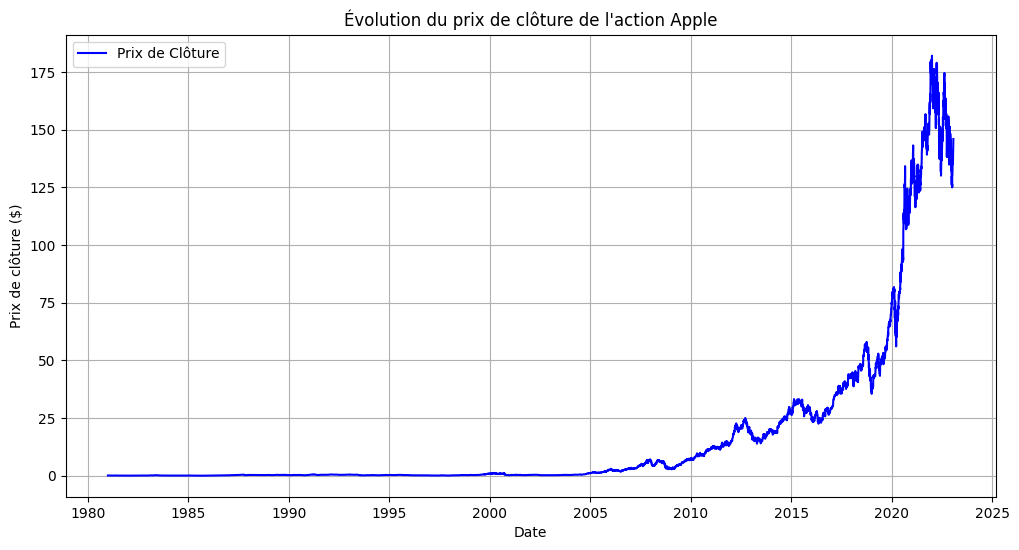

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label="Prix de Clôture", color='blue')
plt.xlabel("Date")
plt.ylabel("Prix de clôture ($)")
plt.title("Évolution du prix de clôture de l'action Apple")
plt.legend()
plt.grid()
plt.show()


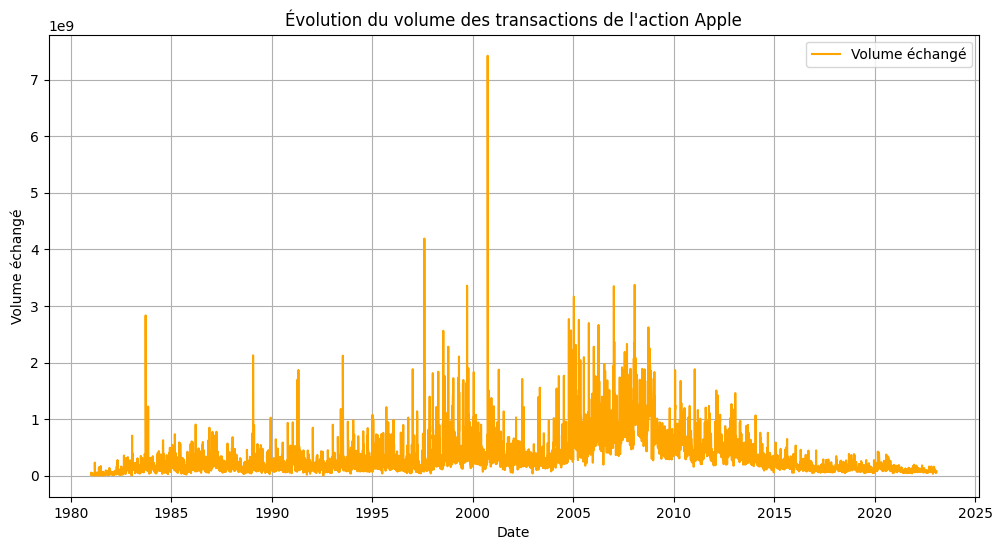

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label="Volume échangé", color='orange')
plt.xlabel("Date")
plt.ylabel("Volume échangé")
plt.title("Évolution du volume des transactions de l'action Apple")
plt.legend()
plt.grid()
plt.show()


on voit donc que en l'an 2000, il ya eu un pic du volume de transactions 

In [21]:
import mplfinance as mpf

mpf.plot(df.tail(100), type='candle', volume=True, style='charles', title="Graphique en chandeliers d'Apple")


ModuleNotFoundError: No module named 'mplfinance'

In [22]:
import mplfinance as mpf

ModuleNotFoundError: No module named 'mplfinance'

In [23]:
pip install mplfinance


     |████████████████████████████████| 75 kB 5.7 MB/s eta 0:00:011
You should consider upgrading via the '/Users/Nicolas/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


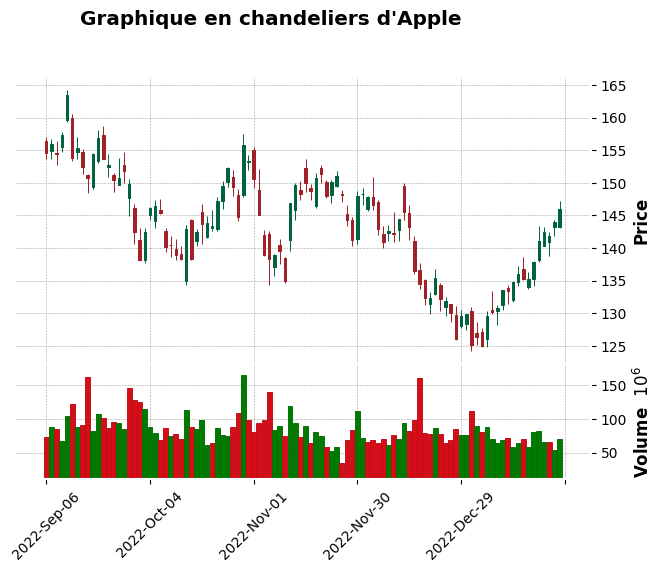

In [24]:
import mplfinance as mpf

mpf.plot(df.tail(100), type='candle', volume=True, style='charles', title="Graphique en chandeliers d'Apple")


In [25]:

stats_close = df['Close'].describe()
stats_volume = df['Volume'].describe()



In [26]:
stats_close

count    10608.000000
mean        16.697362
std         35.473912
min          0.049107
25%          0.288923
50%          0.487701
75%         16.269554
max        182.009995
Name: Close, dtype: float64

In [27]:
stats_volume

count    1.060800e+04
mean     3.275098e+08
std      3.378203e+08
min      0.000000e+00
25%      1.213044e+08
50%      2.145976e+08
75%      4.066804e+08
max      7.421641e+09
Name: Volume, dtype: float64

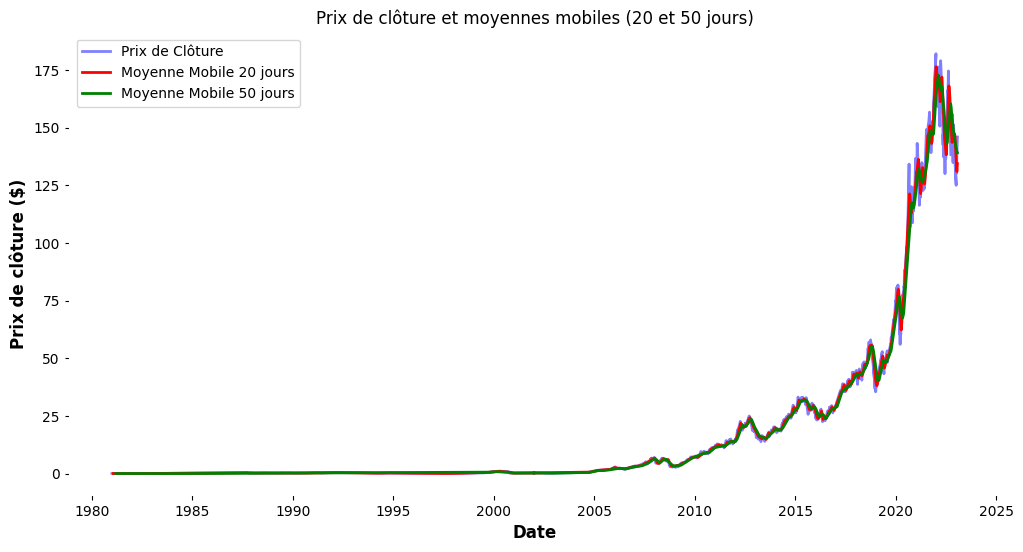

In [28]:

short_window = 20  
long_window = 50   


df['SMA_20'] = df['Close'].rolling(window=short_window).mean()
df['SMA_50'] = df['Close'].rolling(window=long_window).mean()


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label="Prix de Clôture", color='blue', alpha=0.5)
plt.plot(df.index, df['SMA_20'], label="Moyenne Mobile 20 jours", color='red')
plt.plot(df.index, df['SMA_50'], label="Moyenne Mobile 50 jours", color='green')
plt.xlabel("Date")
plt.ylabel("Prix de clôture ($)")
plt.title("Prix de clôture et moyennes mobiles (20 et 50 jours)")
plt.legend()
plt.grid()
plt.show()


In [29]:
from scipy import stats

In [30]:
df_2010 = df.loc['2010-01-01':'2010-12-31']['Close']
df_2020 = df.loc['2020-01-01':'2020-12-31']['Close']


In [31]:
t_stat, p_value = stats.ttest_ind(df_2010, df_2020, equal_var=False)

In [32]:
print(f"📊 Test t de Student entre 2010 et 2020 :")
print(f"Statistique t : {t_stat:.4f}")
print(f"P-value : {p_value:.4f}")

📊 Test t de Student entre 2010 et 2020 :
Statistique t : -62.6501
P-value : 0.0000


In [33]:
if p_value < 0.05:
    print("🔍 Il y a une différence statistiquement significative entre les prix de clôture de 2010 et 2020.")
else:
    print("✅ Aucune différence significative détectée entre 2010 et 2020.")

🔍 Il y a une différence statistiquement significative entre les prix de clôture de 2010 et 2020.
